<a href="https://colab.research.google.com/github/Rub-T/challenge_TelecomX/blob/main/Challenge_telecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

##Importacion de librerias

In [25]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import requests
import numpy as np
import seaborn as sns

##Extraccion del archivo json

In [2]:
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
result=requests.get(url)
df=result.json()
datos=pd.json_normalize(df)

In [3]:
datos.sample(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
6870,9481-SFCQY,No,Female,0,No,Yes,14,Yes,No,DSL,...,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),59.80,824.85
5397,7379-FNIUJ,No,Male,0,No,No,2,Yes,No,Fiber optic,...,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,100.20,198.5
1325,1915-OAKWD,No,Female,0,No,Yes,16,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.30,360.35
5667,7742-MYPGI,No,Female,0,Yes,Yes,6,Yes,No,DSL,...,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,48.80,297.35
3735,5144-PQCDZ,No,Male,0,No,No,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.95,59.25
4894,6692-YQHXC,No,Male,0,No,No,16,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.95,1205.5
5248,7157-SMCFK,No,Male,0,No,Yes,61,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.75,1124.2
2130,2985-JUUBZ,No,Male,0,Yes,Yes,40,Yes,Yes,DSL,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.55,3015.75
507,0722-TROQR,Yes,Female,1,No,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.90,321.75
6664,9162-MVWXH,,Male,0,No,No,1,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#🔧 Transformación

##Transformando datos numericos

Nos dimos cuenta de que al querer transformas los datos de la columna de ingresos total no nos dejaba porque tenia datos de string asi que los manejaremos.

In [5]:
datos['account.Charges.Total']=datos['account.Charges.Total'].astype(str)

#Convertimos los datos a nan
datos['account.Charges.Total']=datos['account.Charges.Total'].replace(' ',np.nan)

In [6]:
#checamos cuantos nan tenemos
datos.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [7]:
#Al ser muy pocos, los borramos
datos=datos.dropna()

In [8]:
datos['account.Charges.Total'].isnull().sum()

np.int64(0)

In [9]:
#Convertimos a dato numerico y confirmamos que este todo bien
datos['account.Charges.Total']=datos['account.Charges.Total'].astype(np.float64)
datos.info()

<ipython-input-9-11e1811bbcab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['account.Charges.Total']=datos['account.Charges.Total'].astype(np.float64)


<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   object 
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   object 
 5   customer.Dependents        7256 non-null   object 
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   object 
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.TechSupport       7256 non-null   object 
 1

##Transformando strings

In [10]:
datos.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
1597,2267-WTPYD,No,Female,1,Yes,No,57,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),94.00,5438.95
5364,7321-ZNSLA,No,Male,0,Yes,Yes,13,No,No phone service,DSL,...,Yes,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35
684,0970-ETWGE,Yes,Male,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.55,89.55
6810,9391-LMANN,No,Male,0,No,Yes,53,Yes,No,Fiber optic,...,Yes,Yes,No,No,Yes,One year,No,Electronic check,95.95,5036.90
444,0626-QXNGV,No,Female,0,Yes,No,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.15,1776.45


In [11]:
column_str=['Churn','customer.gender','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines','internet.InternetService',
            'internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.Contract',
            'account.PaperlessBilling','account.PaymentMethod']
for i in column_str:
  datos[i]=datos[i].str.lower()

datos.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
1337,1930-QPBVZ,no,male,0,yes,yes,68,yes,no,fiber optic,...,yes,no,yes,no,yes,two year,no,bank transfer (automatic),95.10,6683.40
1557,2227-JRSJX,no,female,0,no,no,21,yes,no,fiber optic,...,yes,no,yes,yes,yes,month-to-month,yes,bank transfer (automatic),99.15,1956.40
5160,7037-MTYVW,no,male,0,yes,yes,38,yes,yes,dsl,...,no,yes,yes,yes,yes,two year,yes,bank transfer (automatic),85.40,3297.00
4766,6522-YRBXD,no,male,1,yes,no,35,yes,yes,fiber optic,...,yes,no,no,no,yes,month-to-month,yes,electronic check,94.55,3365.40
3332,4636-JGAAI,no,male,0,yes,no,34,yes,yes,fiber optic,...,yes,no,no,no,yes,month-to-month,no,mailed check,88.85,3000.25


##Creando valores binarios de 1 y 0

Ahora convertiremos en valores binarios las columnas que solo tengan valores de si y no, si contienen otro parametro no contaran

In [12]:
#Lista de columnas con valores solo de si y no
col_bin=['Churn','customer.Partner','customer.Dependents','phone.PhoneService','account.PaperlessBilling']

for i in col_bin:
  print(f'La columna {i} tiene estos datos: {datos[i].unique()}')

La columna Churn tiene estos datos: ['no' 'yes' '']
La columna customer.Partner tiene estos datos: ['yes' 'no']
La columna customer.Dependents tiene estos datos: ['yes' 'no']
La columna phone.PhoneService tiene estos datos: ['yes' 'no']
La columna account.PaperlessBilling tiene estos datos: ['yes' 'no']


In [13]:
#Como la columna churn tiene valores vacios, la trabajaremos aparte
datos['Churn']=datos['Churn'].replace('',np.nan)
datos['Churn'].unique()

array(['no', 'yes', nan], dtype=object)

In [14]:
datos['Churn']=datos['Churn'].replace({'yes':'1','no':'0'})
datos['Churn'].unique()

array(['0', '1', nan], dtype=object)

In [15]:
#Ahora lo haremos con todas las demas
col_bin=['customer.Partner','customer.Dependents','phone.PhoneService','account.PaperlessBilling']
for col in col_bin:
  datos[col]=datos[col].replace({'yes':'1','no':'0'})
  datos[col]=datos[col].astype(np.int64)

for col in col_bin:
  print(f'{col}:{datos[col].unique()}')

customer.Partner:[1 0]
customer.Dependents:[1 0]
phone.PhoneService:[1 0]
account.PaperlessBilling:[1 0]


In [16]:
#Confirmamos que todo este bien
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   int64  
 5   customer.Dependents        7256 non-null   int64  
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   int64  
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.TechSupport       7256 non-null   object 
 1

In [17]:
#Checamos nuestros datos nulos
datos.isnull().sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


##Agregamos columna de ingreso por día

In [18]:
datos['cuentas_diarias']=round(datos['account.Charges.Monthly']/30,2)
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,0,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.80


##Datos generales

In [19]:
datos.describe()

,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
count,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158467
std,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004282
min,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.180000
50%,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.340000
75%,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,3.000000
max,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [20]:
#Creamos copia de nuestros datos principales
datos_resp=datos.copy()

#📊 Carga y análisis

In [21]:
df_churn=datos['Churn'].value_counts()

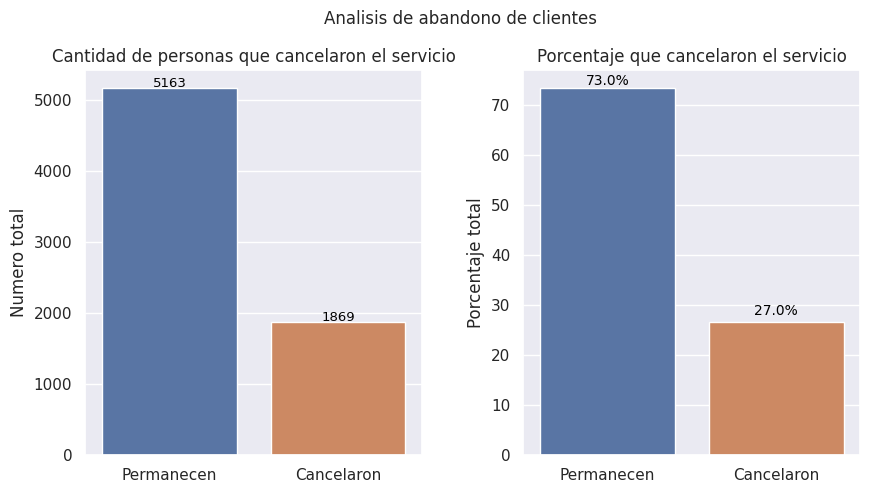

In [26]:
sns.set_palette('pastel')
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Analisis de abandono de clientes',y=1,fontsize=12)
fig.subplots_adjust(hspace=0.5,wspace=0.3)

def graficar_churn_numeros(datos,ax,titulo):
  sns.barplot(x=datos.index,y=datos.values,hue=df_churn.index,ax=ax)
  ax.set_title(titulo)
  ax.set_xticks([0,1])
  ax.set_xticklabels(['Permanecen','Cancelaron'])
  ax.set_ylabel('Numero total')
  ax.set_xlabel('')

  for i,j in enumerate(df_churn.values):
    ax.text(i,j+20,str(j),color='black',fontsize=9.5,ha='center')

def graficar_churn_porcentajes(datos,ax,titulo):
  sns.barplot(x=datos.index,y=((datos.values)/(datos.values.sum())*100),hue=datos.index,ax=ax)
  ax.set_title(titulo)
  ax.set_xticks([0,1])
  ax.set_xticklabels(['Permanecen','Cancelaron'])
  ax.set_ylabel('Porcentaje total')
  ax.set_xlabel('')

  for i,j in enumerate(((datos.values)/(datos.values.sum())*100).round(0)):
    ax.text(i,j+1,str(f'{j}%'),color='black',fontsize=10,ha='center')

graficar_churn_numeros(df_churn,ax[0],'Cantidad de personas que cancelaron el servicio')
graficar_churn_porcentajes(df_churn,ax[1],'Porcentaje que cancelaron el servicio')
plt.show()

#📄Informe final